## Assignment 3

### Import Modules

In [67]:
import struct
import numpy as np
from array import array
import matplotlib.pyplot as plt
import numpy.linalg as LA
from pandas import DataFrame, ExcelWriter

### Function Definitions

In [68]:
def load_mnist(dataset="training", selecteddigits=range(10), path=r'/Users/eve7947/Downloads'):

    #Check training/testing specification. Must be "training" (default) or "testing"
    if dataset == "training":
        fname_digits = path + '/' + 'train-images-idx3-ubyte'
        fname_labels = path + '/' + 'train-labels-idx1-ubyte'
    elif dataset == "testing":
        fname_digits = path + '/' + 't10k-images-idx3-ubyte'
        fname_labels = path + '/' + 't10k-labels-idx1-ubyte'
    else:
        raise ValueError("dataset must be 'testing' or 'training'")
        
        
    #Import digits data
    digitsfileobject = open(fname_digits, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", digitsfileobject.read(16))
    digitsdata = array("B", digitsfileobject.read())
    digitsfileobject.close()

    #Import label data
    labelsfileobject = open(fname_labels, 'rb')
    magic_nr, size = struct.unpack(">II", labelsfileobject.read(8))
    labelsdata=array("B",labelsfileobject.read())
    labelsfileobject.close()
    
    #Find indices of selected digits
    indices=[k for k in range(size) if labelsdata[k] in selecteddigits]
    N=len(indices)
    
    #Create empty arrays for X and T
    X = np.zeros((N, rows*cols), dtype=np.uint8)
    T = np.zeros((N, 1), dtype=np.uint8)
    
    #Fill X from digitsdata
    #Fill T from labelsdata
    for i in range(N):
        X[i] = digitsdata[indices[i]*rows*cols:(indices[i]+1)*rows*cols]
        T[i] = labelsdata[indices[i]]
    
    return X,T

In [69]:
def vectortoimg(v,show=True):
    plt.imshow(v.reshape(28, 28),interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()

In [70]:
def readExcelSheet1(excelfile):
    from pandas import read_excel
    return (read_excel(excelfile)).values

In [71]:
def readExcelRange(excelfile,sheetname="Sheet1",startrow=1,endrow=1,startcol=1,endcol=1):
    from pandas import read_excel
    values=(read_excel(excelfile, sheetname,header=None)).values;
    return values[startrow-1:endrow,startcol-1:endcol]

In [72]:
def readExcel(excelfile,**args):
    if args:
        data=readExcelRange(excelfile,**args)
    else:
        data=readExcelSheet1(excelfile)
    if data.shape==(1,1):
        return data[0,0]
    elif (data.shape)[0]==1:
        return data[0]
    else:
        return data

In [73]:
def writeExcelData(x,excelfile,sheetname,startrow,startcol):
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    df=DataFrame(x)
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine='openpyxl') 
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name=sheetname,startrow=startrow-1, startcol=startcol-1, header=False, index=False)
    writer.save()
    writer.close()

In [74]:
def getSheetNames(excelfile):
    from pandas import ExcelFile
    return (ExcelFile(excelfile)).sheet_names

In [77]:
def count(x, count8, count7):
    for i in T:
        if i == 7:
            count7 +=1
        if i == 8:
            count8 +=1
    return print(count8, count7)

In [78]:
def seperate(T,Y,Y1,Y2):
    for i in range(12116):
        if T[i] == 8:
            Y1.append(Y[i,:])
        if T[i] == 7:
            Y2.append(Y[i,:])
    return Y1, Y2

### Set file & check sheets

In [79]:
excelfile=r"/Users/eve7947/Downloads/Hsing-Yi-Wang-Assignment_3_ Submission_Template_0221.xlsx"

In [80]:
sheets=getSheetNames(excelfile);sheets

['Results', 'Scatter Plot', 'Observations', 'ID']

### Check Data Set

In [81]:
X, T = load_mnist(dataset="training",selecteddigits=[7,8])

In [82]:
print("Checking shape of matrix:", X.shape)
print("Checking min/max values:",(np.amin(X),np.amax(X)))
print("Checking unique labels in T:",list(np.unique(T)))

Checking shape of matrix: (12116, 784)
Checking min/max values: (0, 255)
Checking unique labels in T: [7, 8]


Checking one training vector by plotting image:


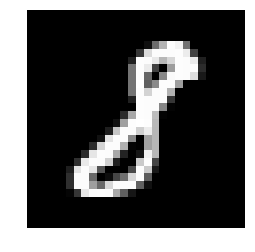

In [83]:
print("Checking one training vector by plotting image:")
vectortoimg(X[-20])

Checking multiple training vectors by plotting images.
Be patient:


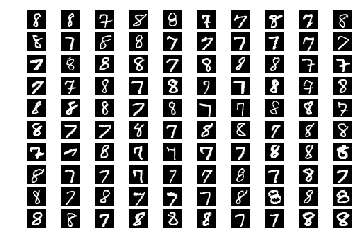

In [84]:
print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure()
nrows=10
ncols=10
for row in range(nrows):
    for col in range(ncols):
        plt.subplot(nrows, ncols, row*ncols+col + 1)
        vectortoimg(X[np.random.randint(len(T))],show=False)
plt.show()

### XZCVPR

In [85]:
X = np.array(X,np.float64)
μ=np.mean(X,axis=0)
Z=X-μ
C=np.cov(Z,rowvar=False)
[λ,V]=LA.eigh(C)
row=V[-1,:];col=V[:,-1]
np.dot(C,row)-(λ[-1]*row) #If the matrix product C.row is the same as λ[-1]*row, this should evaluate to [0,0,0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [86]:
np.dot(C,col)-(λ[-1]*col) #If the matrix product C.col is the same as λ[-1]*col, this should evaluate to [0,0,0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [87]:
λ=np.flipud(λ);V=np.flipud(V.T);
row=V[0,:]; #Check once again
np.dot(C,row)-(λ[0]*row) #If the matrix product C.row is the same as λ[0]*row, this should evaluate to [0,0,0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [88]:
np.allclose(np.dot(C,row),λ[0]*row)

True

In [89]:
P=np.dot(Z,V.T)
R=np.dot(P,V)
Xrec=R+μ

In [132]:
μ_2 = μ.transpose()

In [133]:
μ_2.shape

(784,)

In [91]:
writeExcelData(μ_1,excelfile,'Results',2,2)
writeExcelData(V[0:1,:],excelfile,'Results',3,2)
writeExcelData(V[1:2,:],excelfile,'Results',4,2)
print("Written mu, v1, v2")

Written mu, v1, v2


### 2-D Dimension

In [92]:
P2=np.dot(Z,V.T)
P2=P2[:,0:2]

In [93]:
P2.shape

(12116, 2)

In [94]:
np.mean(P2,axis=0)

array([6.60671034e-14, 2.81402135e-14])

### Input

In [95]:
count(T,0,0)

5851 6265


In [96]:
P21, P22 = seperate(T,P2,[],[])

In [97]:
P21 = np.asarray(P21)
P22 = np.asarray(P22)
P21m=np.mean(P21,axis=0)
P22m=np.mean(P22,axis=0)
print(P21m, P22m)

[-621.53473829  -93.63323005] [580.46284976  87.44581469]


In [98]:
writeExcelData([P21m,P22m],excelfile,'Results',9,2)
print("Written mup, mun")

Written mup, mun


### Testing Data

In [99]:
XP, TP = load_mnist(dataset="testing",selecteddigits=[8])

In [100]:
ZP=XP-μ

In [101]:
PP=np.dot(ZP,V.T)
PP=PP[:,0:2]
RP=np.dot(PP,V[0:2,:])
XrecP=RP+μ

In [102]:
writeExcelData(XP[0:1,:],excelfile,'Results',88,2)
writeExcelData(ZP[0:1,:],excelfile,'Results',89,2)
writeExcelData(PP[0:1,:],excelfile,'Results',90,2)
writeExcelData(RP[0:1,:],excelfile,'Results',91,2)
writeExcelData(XrecP[0:1,:],excelfile,'Results',92,2)
print("Written xp, zp, rp, pp, xrecp")

Written xp, zp, rp, pp, xrecp


In [103]:
XN, TN = load_mnist(dataset="testing",selecteddigits=[7])

In [104]:
ZN=XN-μ

In [105]:
PN=np.dot(ZN,V.T)
PN=PN[:,0:2]
RN=np.dot(PN,V[0:2,:])
XrecN=RN+μ

In [106]:
writeExcelData(XN[0:1,:],excelfile,'Results',94,2)
writeExcelData(ZN[0:1,:],excelfile,'Results',95,2)
writeExcelData(PN[0:1,:],excelfile,'Results',96,2)
writeExcelData(RN[0:1,:],excelfile,'Results',97,2)
writeExcelData(XrecN[0:1,:],excelfile,'Results',98,2)
print("Written xn, zn, rn, pn, xrecn")

Written xn, zn, rn, pn, xrecn


### Apply Histogram Classifier

In [ ]:
def Build2DHistogramClassifier(X,T,B,xmin,xmax):
    H7=np.zeros([B,B]).astype('int32');
    H8=np.zeros([B,B]).astype('int32');
    binindices=(np.round(((B-1)*(X-xmin)/(xmax-xmin)))).astype('int32');
    for i,x in enumerate(binindices):
        if T[i]==7:
            H7[x[0],x[1]]+=1;
        else:
            H8[x[0],x[1]]+=1;
    return [H8, H7]

In [ ]:
def Apply2DHistogramClassifier(queries,H8,H7,xmin,xmax):
    B=np.alen(H8);
    binindices=(np.round(((B-1)*(queries-xmin)/(xmax-xmin)))).astype('int32');
    count7=H7[binindices[:,0],binindices[:,1]];
    count8=H8[binindices[:,0],binindices[:,1]];
    resultlabel=np.full(np.alen(binindices),"Indeterminate",dtype=object);
    resultprob=np.full(np.alen(binindices),np.nan,dtype=object);
    indices7=count7>count8;
    indices8=count8>count7;
    resultlabel[indices7]="7";
    resultlabel[indices8]="8";
    prob7=count7/(count7+count8);
    prob8=count8/(count7+count8);
    resultprob[indices7]=prob7[indices7];
    resultprob[indices8]=prob8[indices8];
    return resultlabel, resultprob

In [107]:
B=32
xmin=np.amin(P2,axis=0)
xmax=np.amax(P2,axis=0)
[H8,H7]=Build2DHistogramClassifier(P2,T,B,xmin,xmax)

In [108]:
writeExcelData(H8,excelfile,'Results',20,2)
writeExcelData(H7,excelfile,'Results',53,2)
print("Written Hp, Hn")

Written Hp, Hn


In [109]:
[resultlabelHp, resultprobHp]=Apply2DHistogramClassifier(PP[0:1,:],H8,H7,xmin,xmax)

In [110]:
[resultlabelHn, resultprobHn]=Apply2DHistogramClassifier(PN[0:1,:],H8,H7,xmin,xmax)

In [111]:
print(DataFrame([resultlabelHp, resultprobHp]).T)

   0  1
0  8  1


In [112]:
print(DataFrame([resultlabelHn, resultprobHn]).T)

   0  1
0  7  1


### Baysian Classifier

In [113]:
def Build2DBayesianClassifer(X,T):
    mu7=np.mean(X[T=='7'],axis=0)
    mu8=np.mean(X[T=='8'],axis=0)
    sigma7=np.cov(X[T=='7'],rowvar=False)
    sigma8=np.cov(X[T=='8'],rowvar=False)
    N7=len(T[T=='7'])
    N8=len(T[T=='8'])
    return[mu8,mu7,sigma8,sigma7,N8,N7]

In [114]:
def pdf(x,mu,sigma):
    d=np.alen(mu)
    dfact1=(2*np.pi)**d
    dfact2=np.linalg.det(sigma)
    fact=1/np.sqrt(dfact1*dfact2)
    xc=x-mu
    isigma=np.linalg.inv(sigma)
    return fact*np.exp(-0.5*np.einsum('ij,jk,ik->i',xc,isigma,xc))

In [141]:
def Apply2DBayesianClassifer(queries,mu8,mu7,sigma8,sigma7,N8,N7):
    A=1
    count7=N7*A*pdf(queries,mu7,sigma7)
    count8=N8*A*pdf(queries,mu8,sigma8)
    resultlabel=np.full(np.alen(queries),"Indeterminate",dtype=object);
    resultprob=np.full(np.alen(queries),np.nan,dtype=object);
    indices7=count7>count8;
    indices8=count8>count7;
    resultlabel[indices7]="7";
    resultlabel[indices8]="8";
    prob7=count7/(count7+count8);
    prob8=count8/(count7+count8);
    resultprob[indices7]=prob7[indices7];
    resultprob[indices8]=prob8[indices8];
    return resultlabel, resultprob

In [142]:
P21m=np.mean(P21,axis=0)
P22m=np.mean(P22,axis=0)
P2min=np.amin(P2,axis=0)
P2max=np.amax(P2,axis=0)
P21cov = np.cov(P21,rowvar=False)
P22cov = np.cov(P22,rowvar=False)

In [143]:
writeExcelData([P2min],excelfile,'Results',17,2)
writeExcelData([P2max],excelfile,'Results',18,2)
print("Written p1min, p1max, p2min, p2max")

Written p1min, p1max, p2min, p2max


In [144]:
writeExcelData(P21cov,excelfile,'Results',12,2)
writeExcelData(P22cov,excelfile,'Results',14,2)
print("Written cp, cn")

Written cp, cn


In [149]:
[resultlabelBp, resultprobBp]=Apply2DBayesianClassifer(PP[0:20,:],P21m,P22m,P21cov,P22cov,5851,6265)

In [150]:
[resultlabelBn, resultprobBn]=Apply2DBayesianClassifer(PN[0:20,:],P21m,P22m,P21cov,P22cov,5851,6265)

In [151]:
print(DataFrame([resultlabelBp, resultprobBp]).T)

    0         1
0   8  0.997342
1   8  0.999249
2   8  0.999981
3   8  0.999997
4   8  0.999969
5   8  0.999923
6   8  0.999934
7   8         1
8   8  0.999999
9   8  0.999887
10  8   0.99936
11  8         1
12  7  0.978632
13  8  0.998805
14  8  0.999762
15  8  0.998011
16  8  0.999999
17  8  0.999934
18  8  0.997253
19  8  0.981921


In [152]:
print(DataFrame([resultlabelBn, resultprobBn]).T)

    0         1
0   7  0.999999
1   7  0.999998
2   7  0.999973
3   7  0.974336
4   7  0.999977
5   7  0.999955
6   7   0.99996
7   7  0.989479
8   7  0.999999
9   7  0.997732
10  7  0.999887
11  7  0.999655
12  7  0.999977
13  7  0.999842
14  7  0.555854
15  8  0.546614
16  7  0.982865
17  7  0.999308
18  7  0.996808
19  7  0.981437


In [123]:
PP_test=PP[0:20,:]
PN_test=PN[0:20,:]

In [124]:
[resultlabelHp1, resultprobHp1]=Apply2DHistogramClassifier(PP_test,H7,H8,xmin,xmax)
[resultlabelHn1, resultprobHn1]=Apply2DHistogramClassifier(PN_test,H7,H8,xmin,xmax)

In [125]:
print(DataFrame([resultlabelHp1, resultprobHp1]).T)
print(DataFrame([resultlabelHn1, resultprobHn1]).T)

    0         1
0   7         1
1   7         1
2   7         1
3   7         1
4   7         1
5   7         1
6   7         1
7   7         1
8   7         1
9   7         1
10  7         1
11  7         1
12  8  0.769231
13  7         1
14  7         1
15  7  0.969697
16  7         1
17  7         1
18  7         1
19  7         1
    0         1
0   8         1
1   8         1
2   8         1
3   8         1
4   8         1
5   8         1
6   8         1
7   8         1
8   8         1
9   8         1
10  8         1
11  8         1
12  8         1
13  8         1
14  8  0.666667
15  7  0.615385
16  8         1
17  8         1
18  8         1
19  8  0.769231


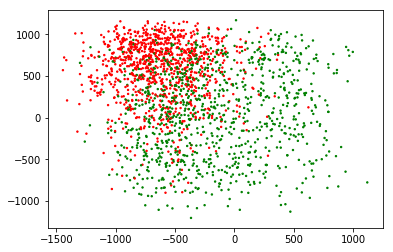

In [140]:
plt.scatter(PP[0:974,:],PN[0:974,:],2,c=['red','green'])
plt.show()